# Introduction

## Goal. 
The goal of this lab is to continue the investigations of Evolutionary Algorithms (EAs) we started in the previous module's exercises. In particular, you will observe the effects of crossover, selection pressure, and population size in artificial evolution, and reflect to what extent these observations also apply to biological evolution.

This lab continues the use of the *inspyred* framework for the Python programming language seen in the previous lab. If you did not participate in the previous lab, you may want to look that over first and then start this lab's exercises.

Note once again that, unless otherwise specified, in this module's exercises we will use real-valued genotypes and that the aim of the algorithms will be to *minimize* the fitness function $f(\mathbf{x})$, i.e. lower values correspond to a better fitness!

# Exercise 1

In this exercise we will analyze the effect of crossover in the EA. An offspring individual is formed from two parent individuals $\mathbf{x}_1$ and $\mathbf{x}_2$ by randomly taking the value for each entry $x_i$ either from $\mathbf{x}_1$ or $\mathbf{x}_2$. The EA has a parameter defining the fraction of offspring that is created using crossover at each generation (the remaining individuals are created via asexual reproduction).

To start the experiments, run the next cell$^{[1]}$.

This script executes $30$ runs using mutation only (as in the previous exercises), and $30$ runs using crossover only. The boxplots compare the best fitness values obtained in the two cases.

- Do you see any difference between the two results? Why?

---
[1]: 
For all the exercises in this lab you may set the seed for the pseudo-random number generator. This will allow you to reproduce your results. 


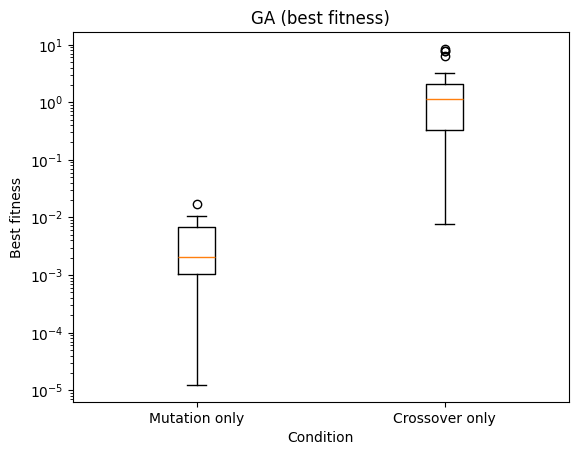

In [1]:
from pylab import *
from random import Random
from utils.utils_02.ga import run_ga
import sys

"""
-------------------------------------------------------------------------
Edit this part to do the exercises
"""

# parameters for the GA
args = {}
args["num_vars"] = 2 # Number of dimensions of the search space
args["gaussian_stdev"] = 1.0 # Standard deviation of the Gaussian mutations
args["tournament_size"] = 2 
args["num_elites"] = 1 # number of elite individuals to maintain in each gen
args["pop_size"] = 20 # population size
args["pop_init_range"] = [-10, 10] # Range for the initial population
args["max_generations"] = 50 # Number of generations of the GA

#num_runs = 1 # Number of runs to be done for each condition
#display = True # Plot initial and final populations --> if True set num_runs = 1 

num_runs = 30
display = False
"""
-------------------------------------------------------------------------
"""

args["fig_title"] = 'GA'

seed = None
rng = Random(seed)
# Only mutation, no crossover
crossover_rate = 0 # Crossover fraction    
mutation_rate = 1.0 # fraction of loci to perform mutation on

# run the GA *num_runs* times and record the best fits
best_fitnesses_mutation_only = [run_ga(rng, display=display, 
                                       crossover_rate=crossover_rate,
                                       mutation_rate=mutation_rate,
                                       **args)[1]
                                for _ in range(num_runs)]

if display and (args["num_vars"] == 1 or args["num_vars"]==2) and num_runs == 1:
    print('Mutation Only')
    print('Best fitness:', best_fitnesses_mutation_only[0])

    show()


# Only crossover, no mutation
mutation_rate = 0.0 # fraction of loci to perform mutation on
crossover_rate = 1.0 # Crossover fraction  

# run the GA *num_runs* times and record the best fits 
best_fitnesses_crossover_only = [run_ga(rng, display=display, 
                                       crossover_rate=crossover_rate,
                                       mutation_rate=mutation_rate,
                                       **args)[1]
                                for _ in range(num_runs)]

if display and (args["num_vars"] == 1 or args["num_vars"]==2) and num_runs == 1:
    print('Crossover Only')
    print('Best fitness:', best_fitnesses_crossover_only[0])
    show()

#if not display or num_runs > 1:
fig = figure('GA (best fitness)')
ax = fig.gca()
ax.boxplot([best_fitnesses_mutation_only, best_fitnesses_crossover_only],
        notch=False)
ax.set_xticklabels(['Mutation only', 'Crossover only'])
ax.set_yscale('log')
ax.set_xlabel('Condition')
ax.set_ylabel('Best fitness')
ax.set_title('GA (best fitness)')

show()

# Exercise 2

In this exercise we will focus on the effect of changing the fraction of offspring created using crossover. Run the next cell to compare the best fitnesses obtained by varying this fraction (while using a fixed mutation probability of $0.5$, i.e. each loci of each genome will have a $50\%$ chance of being mutated). 

- Is there an optimal crossover fraction for this fitness function? Why?


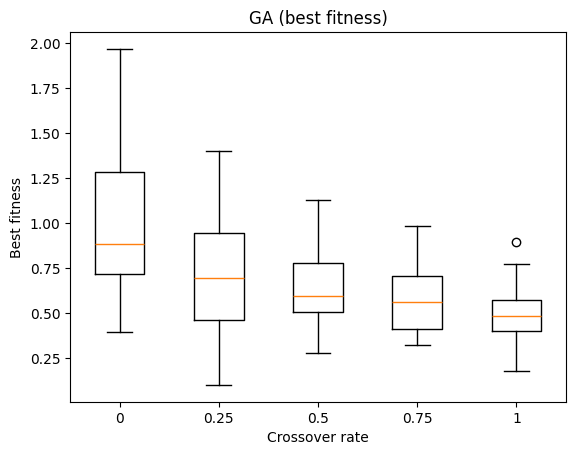

In [2]:
from pylab import *
from random import Random
from utils.utils_02.ga import run_ga
import sys

"""   
-------------------------------------------------------------------------
Edit this part to do the exercises
"""

crossover_rates = [0, 0.25, 0.5, 0.75, 1] # Crossover fractions

# parameters for the GA
args = {}
args["num_vars"] = 10 # Number of dimensions of the search space
args["gaussian_stdev"] = 0.5 # Standard deviation of the Gaussian mutations
args["mutation_rate"] = 0.5 # fraction of loci to perform mutation on
args["tournament_size"] = 2 
args["num_elites"] = 1 # number of elite individuals to maintain in each gen
args["pop_size"] = 20 # population size
args["pop_init_range"] = [-10, 10] # Range for the initial population
args["max_generations"] = 50 # Number of generations of the GA

#num_runs = 1 # Number of runs to be done for each condition 30
#display = True # Plot initial and final populations False

num_runs = 30
display = False 

"""
-------------------------------------------------------------------------
"""

args["fig_title"] = 'GA'

seed = None
rng = Random(seed)
# run the GA *num_runs* times for each crossover fraction 
# and record the best fits 
if not display:
      best_fitnesses = [[run_ga(rng, display=display, 
                              crossover_rate=crossover_rate,**args)[1] 
                        for _ in range(num_runs)]
                        for crossover_rate in crossover_rates]
else:
      best_fitnesses = []
      for crossover_rate in crossover_rates:
            print('Crossover rate:', crossover_rate)
            best_fitnesses_ = [run_ga(rng, display=display, 
                              crossover_rate=crossover_rate,**args)[1] 
                        for _ in range(num_runs)]
            best_fitnesses.append(best_fitnesses_)
            show()

fig = figure('GA (best fitness)')
ax = fig.gca()
ax.boxplot(best_fitnesses,notch=False)
ax.set_xticklabels(crossover_rates)
ax.set_xlabel('Crossover rate')
ax.set_ylabel('Best fitness')
ax.set_title('GA (best fitness)')
show()

# Exercise 3

We will now investigate the effect of the selection pressure. In the previous exercises, we were using tournament selection with a tournament size of 2. Run the next cell to compare the best fitness values and the distances from the global optimum obtained using tournament sizes 2 and 10.

- Which tournament size gives better results for the fitness function sphere and why?
- Which tournament size is better for the fitness function __[Rastrigin](https://pythonhosted.org/inspyred/reference.html?highlight=rastrigin#inspyred.benchmarks.Rastrigin)__ (you can change the problem by changing the parameter `problem_class` in the script) and why?



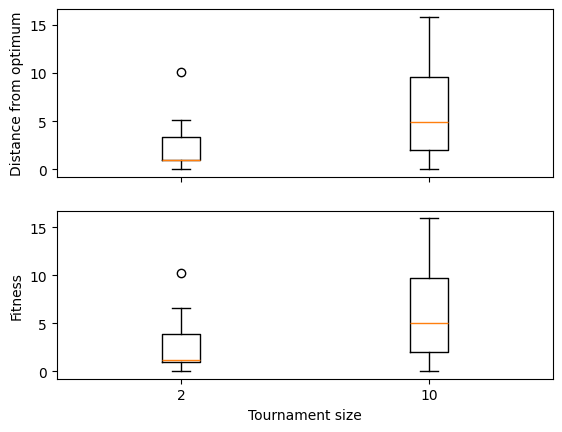

In [3]:
from pylab import *
from random import Random
from utils.utils_02.ga import run_ga
from inspyred import benchmarks
import sys

"""   
-------------------------------------------------------------------------
Edit this part to do the exercises
"""

tournament_sizes = [2, 10]

# choose problem
#problem_class = benchmarks.Sphere
problem_class = benchmarks.Rastrigin

# parameters for the GA
args = {}
args["num_vars"] = 2 # Number of dimensions of the search space
args["gaussian_stdev"] = 0.2 # Standard deviation of the Gaussian mutations
args["crossover_rate"]  = 0.0 # Crossover fraction
args["mutation_rate"] = 1.0 # fraction of loci to perform mutation on
args["num_elites"] = 1 # number of elite individuals to maintain in each gen
args["pop_size"] = 25 # population size
args["pop_init_range"] = [-10, 10] # Range for the initial population
args["max_generations"] = 50 # Number of generations of the GA

num_runs = 30 # Number of runs to be done for each condition
display = False # Plot initial and final populations


#num_runs = 1 # Number of runs to be done for each condition
#display = True # Plot initial and final populations
"""
-------------------------------------------------------------------------
"""

args["fig_title"] = 'GA'

seed = None
rng = Random(seed)
    
# run the GA *num_runs* times for each crossover fraction 
# and record results 

if not display:
       results = asarray([[run_ga(rng, problem_class=problem_class,
                            display=display, 
                            tournament_size=tournament_size,**args)
                     for _ in range(num_runs)]
                     for tournament_size in tournament_sizes],dtype=object)
else:
       results = []
       for tournament_size in tournament_sizes:
              print('Tournament size:', tournament_size)
              results_ = [run_ga(rng, problem_class=problem_class,
                                display=display, 
                                tournament_size=tournament_size,**args)
                        for _ in range(num_runs)]
              results.append(results_)
              show()

best_fitnesses = [[run_result[1] for run_result in runs] 
                  for runs in results]
distance_from_global_optimums = [[sum(asarray(run_result[0],dtype=object) ** 2)
                                    for run_result in runs]
                                    for runs in results]

fig = figure('GA (distance from optimum and best fitness)')
# Boxplot comparing the distance from the global optimum
ax = fig.add_subplot(2,1,1)
ax.boxplot(distance_from_global_optimums,notch=False)
ax.set_xticklabels([])
#ax.set_xlabel('Tournament size')
ax.set_ylabel('Distance from optimum')

# Boxplot comparing the best fitnesses
ax = fig.add_subplot(2,1,2)
ax.boxplot(best_fitnesses,notch=False)
ax.set_xticklabels(tournament_sizes)
ax.set_xlabel('Tournament size')
ax.set_ylabel('Fitness')
show()

# Exercise 4

In this exercise you will run the EA on many test functions commonly used to benchmark optimization algorithms. Run the EA on some of the test functions shown in the comments of the next cell (especially the multimodal functions) and adapt the mutation magnitude, crossover rate, selection pressure, and population size so as to get the best results. If you run the code as provided it will initialize and bound the values of your population vectors to suitable ranges. You may comment/uncomment certain lines to alter this behavior. See the comments in the next cell for further details. 

You may first try the 1D or 2D case, which has the advantage that the fitness landscape can be visualized. However, keep in mind that sometimes the resolution of the plot is not sufficient to accurately represent a function.

- Do you see a different algorithmic behavior when you test the EA on different benchmark functions? Why?
- What is the effect of changing the number of variables on each tested function?


---
[1]:
See __[link](https://pythonhosted.org/inspyred/reference.html\#single-objective-benchmarks)__ for a list of single-objective benchmark problems.

Best Individual [421.15259143 200.82527969]
Best Fitness 218.27876200103117


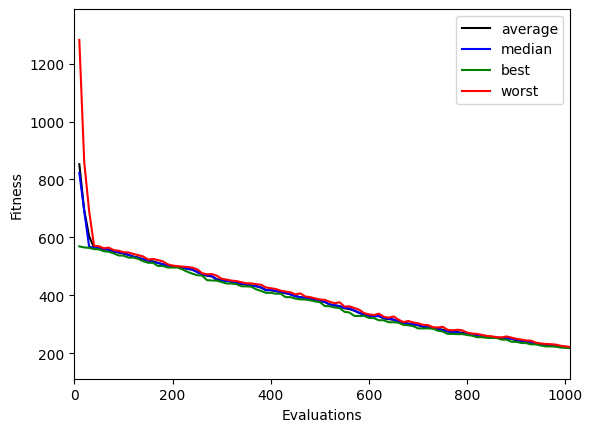

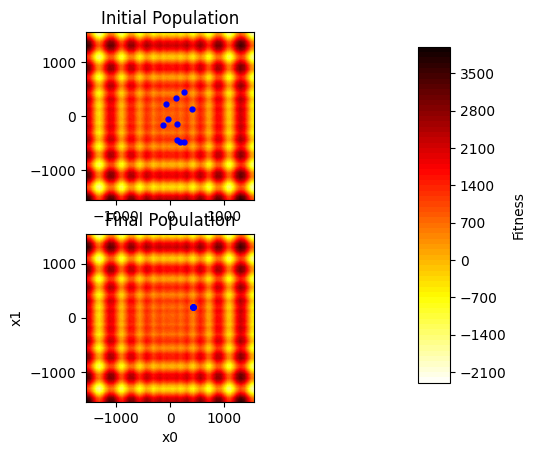

In [4]:
from pylab import *
from random import Random
from utils.utils_02.ga import run_ga
from inspyred import benchmarks
import sys

"""
-------------------------------------------------------------------------
Edit this part to do the exercises
"""

# parameters for the GA
args = {}
args["num_vars"] = 2 # Number of dimensions of the search space
args["gaussian_stdev"] = 1 # Standard deviation of the Gaussian mutations
args["crossover_rate"]  = 0.5 # Crossover fraction
args["tournament_size"] = 2
args["pop_size"] = 10 # population size

args["num_elites"] = 1 # number of elite individuals to maintain in each gen
args["mutation_rate"] = 0.5 # fraction of loci to perform mutation on

# by default will use the problem's defined init_range
# uncomment the following line to use a specific range instead
#args["pop_init_range"] = [-500, 500] # Range for the initial population
args["use_bounder"] = True # use the problem's bounder to restrict values
# comment out the previously line to run unbounded

args["max_generations"] = 100 # Number of generations of the GA
display = True # Plot initial and final populations

# other problems to try, 
# see  https://pythonhosted.org/inspyred/reference.html#module-inspyred.benchmarks

# unimodal 
#problem_class = benchmarks.Sphere
#problem_class = benchmarks.Rosenbrock

# multimodal 
#problem_class = benchmarks.Griewank
#problem_class = benchmarks.Ackley
#problem_class = benchmarks.Rastrigin
problem_class = benchmarks.Schwefel

"""
-------------------------------------------------------------------------
"""

args["fig_title"] = 'GA'

seed = None
rng = Random(seed)
best_individual, best_fitness, final_pop = run_ga(rng, display=display,
                                       problem_class=problem_class,**args)
print("Best Individual", best_individual)
print("Best Fitness", best_fitness)

if display :
    ioff()
    show()

## Instructions and questions

Concisely note down your observations from the previous exercises (follow the bullet points) and think about the following questions. 

- Why is it useful to introduce crossover in EA? Can you think of any cases when mutation only can work effectively, without crossover? 
What about using crossover only, without mutation?
- What's the effect of changing the fraction of offspring created by crossover?
- Are there optimal parameters for an EA?
What are the advantages and disadvantages of low/high selection pressure?